<a href="https://colab.research.google.com/github/ashikshafi08/AICrowd_Competition_Files/blob/main/Scrap_Notebooks/AICrowd_Positive_Negative_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
!pip install aicrowd-cli
API_KEY = 'c81a49931a7ac4bdd334164e7cde9e85' 
!aicrowd login --api-key $API_KEY

# Downloading the Dataset
!mkdir data
!aicrowd dataset download --challenge emotion-detection -j 3 -o data

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 174kB 11.9MB/s 
     |████████████████████████████████| 215kB 42.8MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
API Key valid
Saved API Key successfully!
test.csv:   0% 0.00/642k [00:00<?, ?B/s]
test.csv: 100

In [2]:
# Importing all the packages we need 
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing the data 

train_data = pd.read_csv('data/train.csv')
val_data = pd.read_csv('data/val.csv')
test_data = pd.read_csv('data/test.csv')

# Printing out all shapes of our data 
print(f'Shape of the train data: {train_data.shape}')
print(f'Shape of the validation data: {val_data.shape}')
print(f'Shape of the test data: {test_data.shape}')

Shape of the train data: (31255, 2)
Shape of the validation data: (3473, 2)
Shape of the test data: (8682, 2)


In [4]:
# How does our train data looks like? 
train_data.head()

,text,label
0,takes no time to copy/paste a press release,0
1,You're delusional,1
2,Jazz fan here. I completely feel. Lindsay Mann...,0
3,ah i was also confused but i think they mean f...,0
4,Thank you so much. ♥️ that means a lot.,0


In [5]:
# Is there any missing data? 
train_data.isna().sum()

text     0
label    0
dtype: int64

In [6]:
# Checking whether labels are balanced or not 
train_data['label'].value_counts() 

0    24718
1     6537
Name: label, dtype: int64

Alright it seems like most of the 

In [8]:
# Shuffling our train data 
train_data_shuffled = train_data.sample(frac = 1 , random_state = 42)
train_data_shuffled.head() , train_data_shuffled.shape

(                                                    text  label
 13976                                           Yaaaay!!      0
 3256   says the insecure idiot who just had to dig th...      0
 24501  Game still "fun" if you don't tryhard and play...      0
 22477  Connie Drake learned to fight smarter, not har...      0
 16658               And she jumped into sewage. Yeh, no.      1, (31255, 2))

In [9]:
# Printing 5 random texts and label of it
import random 

# Creating the random index 
random_index = random.randint(0 , len(train_data) - 5)
for row in train_data[['text' , 'label']][random_index:random_index+5].itertuples():
  _ , text , label = row
  print(f'Label: {label}' , "(Negative)" if label > 0 else "(Positive)")
  print(f'Text:\n{text}\n')
  print('----\n')
  

Label: 0 (Positive)
Text:
I’m not crying! You’re crying!

----

Label: 0 (Positive)
Text:
Thank you! I didn't realize that.

----

Label: 0 (Positive)
Text:
did it work?

----

Label: 0 (Positive)
Text:
This has always been a thing in assassin creed be friends with civilians or they will own u

----

Label: 0 (Positive)
Text:
I wish Thomas Young would read our Subreddit and comment in here.

----



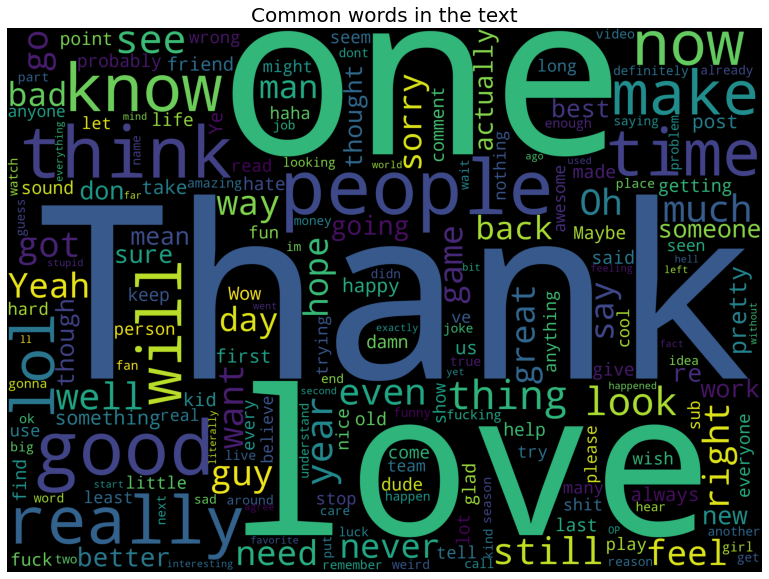

In [10]:
# Constructing a World Cloud

from wordcloud import WordCloud , STOPWORDS
plt.figure(figsize = (20 , 10))
text = train_data['text'].values

# Constructing the word cloud 
cloud = WordCloud(
    stopwords = STOPWORDS , 
    background_color = 'black' , 
    collocations = False , 
    width = 2500 , 
    height = 1800
).generate(' '.join(text))

plt.axis(False)
plt.title('Common words in the text' , fontsize = 20)
plt.imshow(cloud)

In [82]:
# Splitting sentences and labels
train_sentences = train_data_shuffled['text'].to_numpy()
train_labels = train_data_shuffled['label'].to_numpy()

val_sentences = val_data['text'].to_numpy()
val_labels = val_data['label'].to_numpy()

test_sentences = test_data['text'].to_numpy()
test_labels = test_data['label'].to_numpy()


# Checking the shapes 
print(f'Shape of the train sentences: {train_sentences.shape}')
print(f'Shape of the validation sentences: {val_sentences.shape}')
print(f'Shape of the train labels: {train_labels.shape}')
print(f'Shape of the validation labels: {val_labels.shape}')

Shape of the train sentences: (31255,)
Shape of the validation sentences: (3473,)
Shape of the train labels: (31255,)
Shape of the validation labels: (3473,)


In [13]:
# Checking the first 5 samples 
train_sentences[:5] , train_labels[:5]

(array(['Yaaaay!!',
        'says the insecure idiot who just had to dig through my comment history to try to get back at me. lol creep',
        'Game still "fun" if you don\'t tryhard and play on QM but some people are trolling on other mode and that\'s Can be hard for nerv.',
        'Connie Drake learned to fight smarter, not harder. I love her development so much',
        'And she jumped into sewage. Yeh, no.'], dtype=object),
 array([0, 0, 0, 0, 1]))

Now it's time to convert our words to numbers using tokenization and we are going to use a Text Vectorization layer from tensorflow 

In [15]:
# Importing the tokenization layer 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
# Defining our Text Vectorization 

# Setup text vectorization variable 
max_vocab_length = 10000 # Max number of words to have in our vocabulary
max_length = 18 # max length our sequence will be (e.g how many words from text does a model see)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length , 
                                    standardize = 'lower_and_strip_punctuation' , 
                                    split = 'whitespace' , 
                                    ngrams = None , 
                                    output_mode = 'int' , 
                                    output_sequence_length = max_length , 
                                    pad_to_max_tokens = True)

In [17]:

# Find the average number of tokens (words) in the training texts. 
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

13

In [18]:
# Fitting our layer to the dataset and make it learn 
text_vectorizer.adapt(train_sentences)

In [19]:
# Let's see how our text vectorization works 
sample_sentence = "Hey, you look wonderful today!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 18), dtype=int64, numpy=
array([[385,   6, 143, 742, 361,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0]])>

In [20]:
# Getting the unique words our tokenizer stored in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

# Most common words in our vocabulary 
top_5_words = words_in_vocab[:5]

# Least common words in our vocabulary 
bottom_5_words = words_in_vocab[-5:]

print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'5 most common words: {top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'i', 'to']
5 least common words: ['permit', 'permission', 'perks', 'percentile', 'pepsi']


Now we have mapped our text into numbers, on the next step we will turn those numbers into embeddings. 

In [21]:
max_vocab_length , max_length

(10000, 18)

In [22]:
# Creating an Embedding layer 
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length , 
                             output_dim = 128 , 
                             input_length = max_length)

embedding

In [23]:
# Get a random sentence from our training sentence 
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence}')

# Mapping text into numbers (turn into dense vectors of fixed size)
tokenized_form = text_vectorizer([random_sentence]) 
print(f'\n After turning our text into numbers:\n\n {tokenized_form}')

# Using our embedding layer 
print(f'\nApplying the embedding layer to our tokenized vector\n\n {embedding(tokenized_form)}')

Original text:
 Sloppy ball handling and feels like there’s a lid on the bucket. Just not our day

 After turning our text into numbers:

 [[3682  750 3484    7  434   25  630    5    1   19    2 4394   22   18
   162  140    0    0]]

Applying the embedding layer to our tokenized vector

 [[[-0.03552995 -0.04627204  0.02970029 ...  0.02673074  0.00578147
   -0.00503409]
  [ 0.02964843 -0.03213434  0.00150043 ... -0.02945188  0.02646451
    0.03803159]
  [ 0.04228444  0.01034491 -0.01080377 ... -0.02885505 -0.02487884
   -0.00226492]
  ...
  [ 0.04870174  0.03811406 -0.03678676 ...  0.00962668 -0.03821708
    0.00666995]
  [-0.04918438  0.01289338 -0.00059873 ... -0.00799177 -0.04346947
    0.01438156]
  [-0.04918438  0.01289338 -0.00059873 ... -0.00799177 -0.04346947
    0.01438156]]]


Every single token in our sequence are now in the format of 128 long vectors 

## Modelling (Fun part)

Here we are going to built different kinds of model like,
We're going to build,

- Model 0: Naive Bayes (common baseline for text based data- tf-idf)
- Model 1: Feed-forward neural network (dense model)
- Model 2: LSTM model (RNN)
- Model 3: GRU model (RNN)
- Model 4: Bidirectional-LSTM model (RNN)
- Model 5: 1D Convolutional Neural Network
- Model 6: TensorFlow Hub Pre-trained Feature Extractor
- Model 7: Fine tuning model 


In [24]:
# Checking the shapes of our splits 
train_sentences.shape , train_labels.shape , val_sentences.shape , val_labels.shape

((31255,), (31255,), (3473,), (3473,))

### Model 0: Baseline Model 

To build a baseline model, we'll use Multinomial Naive Bayes using the TF-IDF to convert our words into numbers 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


# Create tokenization and constructing a pipeline out of it
model_0 = Pipeline([
                    ('tfidf' , TfidfVectorizer()),
                    ('clf' , MultinomialNB())
])

# Fit the pipeline to the training data 
model_0.fit(train_sentences , train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
# Evaluate our baseline model 
baseline_score = model_0.score(val_sentences , val_labels)
print(f'Our baseline mdoel achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline mdoel achieves an accuracy of: 79.36%


In [28]:
def classification_evaluation_metrics(y_true , 
                                      y_preds):
  '''
  Arguments: 
  y_true --> true labels of the data 
  y_preds --> predicted labels of the data 

  Returns: 
  A dictionary of evaluation metrics like precision , recall and f1_score
  '''

  # Let's first import the needed metrics 
  from sklearn.metrics import precision_score , f1_score , accuracy_score , recall_score

  # Creting the metrics 
  accuracy = accuracy_score(y_true , y_preds)
  f1_score = f1_score(y_true , y_preds)
  precision = precision_score(y_true , y_preds)
  recall = recall_score(y_true , y_preds)

  # Now will create a dictionary of these metrics and pack them
  evaluation_dict = {'Accuracy:': accuracy * 100 , 
                     'F1_Score: ': f1_score , 
                     'Precision: ': precision , 
                     'Recall: ': recall }

  # Return our dictionary 
  return evaluation_dict

In [48]:
val_baseline_preds = model_0.predict(test_data['text'])
val_baseline_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# Using the above function 
baseline_results = classification_evaluation_metrics(test_data['label'] , 
                                                    val_baseline_preds)

# Looking into the dictionary of evaluation metrics 
baseline_results

{'Accuracy:': 49.61990324809952,
 'F1_Score: ': 0.007262823422605537,
 'Precision: ': 0.48484848484848486,
 'Recall: ': 0.003658815458495312}

Alright we got a score of 49% and very low F1-Score, lets train a LSTM model and see if we can get a much better score. 

In [29]:
# Create an LSTM Model 
from tensorflow.keras import layers 


# Setting up the inputs 
inputs = layers.Input(shape = (1,) , dtype = tf.string)

# Converting text into numbers and creating a embedding
x = text_vectorizer(inputs)
x = embedding(x)
print(f'After embedding: {x.shape}')

# Building the LSTM model 
x = layers.LSTM(64)(x)
#x = layers.LSTM(64)(x)
#x = layers.LSTM(10)(x)
x = layers.Dense(10 , activation='relu')(x)


# Initializing our outputs 
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

# Packing into a model 
lstm_model = tf.keras.Model(inputs , outputs , name='LSTM_Model')

# Printing the summary of the model 
lstm_model.summary()

After embedding: (None, 18, 128)
Model: "LSTM_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 18)                0         
_________________________________________________________________
embedding (Embedding)        (None, 18, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,330,069
Trainable params: 1,330,069
Non-trainable params: 0
_____________

In [30]:
# Compile the mdoel 
lstm_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , 
                   metrics = ['accuracy'])

In [31]:
# Fit the model 
lstm_model_history = lstm_model.fit(train_sentences , 
                                    train_labels , 
                                    validation_data = (val_sentences , val_labels), 
                                    epochs = 10 )                                    

Epoch 1/10
977/977 [==============================] - 27s 20ms/step - loss: 0.4916 - accuracy: 0.7922 - val_loss: 0.4226 - val_accuracy: 0.8065
Epoch 2/10
977/977 [==============================] - 17s 17ms/step - loss: 0.3652 - accuracy: 0.8405 - val_loss: 0.3997 - val_accuracy: 0.8238
Epoch 3/10
977/977 [==============================] - 17s 17ms/step - loss: 0.3182 - accuracy: 0.8625 - val_loss: 0.4003 - val_accuracy: 0.8278
Epoch 4/10
977/977 [==============================] - 18s 18ms/step - loss: 0.2922 - accuracy: 0.8748 - val_loss: 0.4269 - val_accuracy: 0.8261
Epoch 5/10
977/977 [==============================] - 17s 17ms/step - loss: 0.2726 - accuracy: 0.8852 - val_loss: 0.4557 - val_accuracy: 0.8172
Epoch 6/10
977/977 [==============================] - 16s 16ms/step - loss: 0.2587 - accuracy: 0.8919 - val_loss: 0.4737 - val_accuracy: 0.8079
Epoch 7/10
977/977 [==============================] - 16s 16ms/step - loss: 0.2467 - accuracy: 0.8967 - val_loss: 0.4946 - val_accuracy:

In [69]:
lstm_pred_probs = lstm_model.predict(test_sentences)
lstm_pred_probs[:10]

array([[0.38154212],
       [0.00860369],
       [0.00500055],
       [0.33179194],
       [0.61015207],
       [0.02591857],
       [0.10512507],
       [0.8693167 ],
       [0.00088327],
       [0.02358222]], dtype=float32)

In [75]:
# Converting into labels 
lstm_preds = tf.cast(tf.squeeze(tf.round(lstm_pred_probs)) , tf.int32)
lstm_preds[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)>

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [34]:
classification_evaluation_metrics(val_labels , 
                                  lstm_preds)

{'Accuracy:': 79.75813417794414,
 'F1_Score: ': 0.4773234200743494,
 'Precision: ': 0.518578352180937,
 'Recall: ': 0.44214876033057854}

In [76]:
# Dropping the label column
test_data.drop('label' , inplace = True , axis = 1)

In [77]:
test_data['label'] = lstm_preds
test_data.head()


,text,label
0,I was already over the edge with Cassie Zamora...,0
1,I think you're right. She has oodles of cash a...,0
2,Haha I love this. I used to give mine phone bo...,0
3,Probably out of desperation as they going no a...,0
4,Sorry !! You’re real good at that!!,1


In [ ]:
test_data['label'] = test_data['label'].apply()

In [78]:
test_data.to_csv('submission.csv' , index=False)

In [81]:
# Creating the random index 
random_index = random.randint(0 , len(test_data) - 5)
for row in test_data[['text' , 'label']][random_index:random_index+5].itertuples():
  _ , text , label = row
  print(f'Label: {label}' , "(Negative)" if label > 0 else "(Positive)")
  print(f'Text:\n{text}\n')
  print('----\n')
  

Label: 0 (Positive)
Text:
I do! I buy 5-blade Dorcos. I'll never go back to razors marketed to women.

----

Label: 1 (Negative)
Text:
I am truly sorry, I did not realise you thought immigration had no bearing on brexit. I shall not overestimate your intellectual abilities in future, i promise.

----

Label: 1 (Negative)
Text:
You're going to be pissed.

----

Label: 0 (Positive)
Text:
A nice reminder that no one even considered giving acuna for gray

----

Label: 0 (Positive)
Text:
Yes. His name is Rodney Diaz. He was good friends with Rodney Diaz and used to make YouTube videos with Rodney Diaz, another rapper.

----



Kinda same results except this time our model's F1_score has improved, let's try some other models and see what happens next.  

In [66]:
# Creating a GRU model 
inputs = layers.Input(shape = (1,) , dtype = tf.string)

# Converting text into numbers 
x = text_vectorizer(inputs)
x = embedding(x)

# Building our GRU model 
x = layers.GRU(64)(x)

# Output layer 
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

# Packing into a model 
gru_model = tf.keras.Model(inputs , outputs)

# Summary of the model 
gru_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_2 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile and fit the model 
gru_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])

# Fit the model 
gru_model_history = gru_model.fit(train_sentences , 
                                  train_labels , 
                                  validation_data = (val_sentences , val_labels) , 
                                  epochs = 5)


Epoch 1/5
977/977 [==============================] - 23s 21ms/step - loss: 0.1548 - accuracy: 0.9374 - val_loss: 0.9552 - val_accuracy: 0.7907
Epoch 2/5
977/977 [==============================] - 21s 21ms/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 1.1061 - val_accuracy: 0.7711
Epoch 3/5
977/977 [==============================] - 20s 21ms/step - loss: 0.0288 - accuracy: 0.9898 - val_loss: 1.2460 - val_accuracy: 0.7806
Epoch 4/5
977/977 [==============================] - 21s 21ms/step - loss: 0.0254 - accuracy: 0.9910 - val_loss: 1.3147 - val_accuracy: 0.7823
Epoch 5/5
977/977 [==============================] - 21s 21ms/step - loss: 0.0211 - accuracy: 0.9924 - val_loss: 1.4030 - val_accuracy: 0.7699


In [69]:
gru_model_pred_probs = gru_model.predict(test_data['text'].to_numpy())
gru_model_pred_probs[:10]
# Converting into labels 
gru_preds = tf.squeeze(tf.round(gru_model_pred_probs))
gru_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [71]:
classification_evaluation_metrics(test_data['label'].to_numpy() , 
                                            gru_preds)

{'Accuracy:': 49.020962911771484,
 'F1_Score: ': 0.28681920721882054,
 'Precision: ': 0.4855428259683579,
 'Recall: ': 0.20352160987880175}

Hmm.. The same results, will try another set of models if the results are not convincing then regularize the model.

In [73]:
# Creating a Bidirectional RNN model 
inputs = layers.Input(shape = (1,) , dtype = tf.string)

# Convert text into numbers and perform word embeddings 
x = text_vectorizer(inputs)
x = embedding(x)

# Adding a Bidirectional RNN layer 
x = layers.Bidirectional(layers.LSTM(10 , return_sequences= True))(x)
x = layers.Bidirectional(layers.GRU(20))(x)

# Output layer 
outputs = layers.Dense(1 , activation = 'sigmoid')(x)

# Packing into a model 
bidirectional_model = tf.keras.Model(inputs , outputs , name = 'Bidirectional_model')


In [74]:
# Compile and fit the model
bidirectional_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                            optimizer = tf.keras.optimizers.Adam() , 
                            metrics = ['accuracy'])

# Fit the model 
bidirectional_model_history = bidirectional_model.fit(train_sentences , 
                                                      train_labels , 
                                                      validation_data = (val_sentences , val_labels) , 
                                                      epochs = 5)

Epoch 1/5
977/977 [==============================] - 51s 33ms/step - loss: 0.1852 - accuracy: 0.9232 - val_loss: 0.8409 - val_accuracy: 0.7924
Epoch 2/5
977/977 [==============================] - 31s 32ms/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 1.0439 - val_accuracy: 0.7792
Epoch 3/5
977/977 [==============================] - 31s 31ms/step - loss: 0.0315 - accuracy: 0.9881 - val_loss: 1.2263 - val_accuracy: 0.7872
Epoch 4/5
977/977 [==============================] - 31s 32ms/step - loss: 0.0230 - accuracy: 0.9915 - val_loss: 1.4319 - val_accuracy: 0.7855
Epoch 5/5
977/977 [==============================] - 31s 31ms/step - loss: 0.0213 - accuracy: 0.9923 - val_loss: 1.5217 - val_accuracy: 0.7832


Looks like it will be the same results rather getting the predictions will move onto another model. 

In [78]:
# Building a Conv1D model 
inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vectorizer(inputs)
x = embedding(x)

# Out Conv1D layer 
x = layers.Conv1D(32 , 
                  kernel_size = 5 , 
                  padding = 'same' , 
                  activation = 'relu')(x)
x = layers.Dense(20 , activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)

# Output layer 
outputs = layers.Dense(1, activation = 'sigmoid')(x)

# Packing ino a model 
conv_model = tf.keras.Model(inputs , outputs , name = 'Conv1d_Model' )

# Compiling a model 
conv_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , 
                   metrics = ['accuracy'])

# Fit the model 
conv_model.fit(train_sentences , train_labels , 
               validation_data = (val_sentences , val_labels) , 
               epochs = 5)

Epoch 1/5
977/977 [==============================] - 15s 15ms/step - loss: 0.3096 - accuracy: 0.8625 - val_loss: 0.4644 - val_accuracy: 0.8054
Epoch 2/5
977/977 [==============================] - 14s 15ms/step - loss: 0.1984 - accuracy: 0.9238 - val_loss: 0.5221 - val_accuracy: 0.8007
Epoch 3/5
977/977 [==============================] - 15s 15ms/step - loss: 0.1635 - accuracy: 0.9403 - val_loss: 0.5715 - val_accuracy: 0.7959
Epoch 4/5
977/977 [==============================] - 14s 15ms/step - loss: 0.1410 - accuracy: 0.9495 - val_loss: 0.6215 - val_accuracy: 0.7941
Epoch 5/5
977/977 [==============================] - 14s 15ms/step - loss: 0.1238 - accuracy: 0.9569 - val_loss: 0.6560 - val_accuracy: 0.7921


In [79]:
# Getting the predictions 
conv_preds = tf.squeeze(tf.round(conv_model.predict(test_data['text'].to_numpy())))
conv_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [80]:
classification_evaluation_metrics(test_data['label'] , 
                                  conv_preds)

{'Accuracy:': 49.861782999308915,
 'F1_Score: ': 0.2695083067628797,
 'Precision: ': 0.5063051702395964,
 'Recall: ': 0.1836268008232335}

### Using TensorFlow Hub for Pre-trained word embeddings

In [96]:
# Importing tensorflow hub 
import tensorflow_hub as hub 

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

# Getting a glimpse of our use 
embed_samples = embed([sample_sentence ])
embed_samples[:3]

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 2.59307828e-02, -2.83388495e-02,  2.01881840e-03,
        -4.70667891e-02,  1.13064311e-02,  2.53085028e-02,
         2.67062746e-02,  8.87637362e-02,  3.31565477e-02,
        -7.46841761e-05, -6.47625493e-05, -7.62950629e-02,
        -3.46361101e-02,  6.25565201e-02,  5.82967997e-02,
        -1.02549464e-01, -2.37759668e-02,  3.60392667e-02,
        -5.82292639e-02, -2.11657248e-02,  9.50246397e-03,
        -3.39860693e-02, -5.67204971e-03,  6.17437959e-02,
        -8.43927357e-03, -3.19596641e-02,  6.45254254e-02,
         2.96431035e-02, -5.90171665e-02,  4.87493463e-02,
         7.28726164e-02,  4.33074571e-02,  6.57620281e-02,
        -5.84228942e-03, -3.70563306e-02,  7.74400607e-02,
        -3.00151296e-03, -7.74305314e-02, -4.84131202e-02,
        -3.10716722e-02,  6.15240075e-02,  5.22387214e-04,
        -9.58177540e-03,  1.96701158e-02,  6.04649819e-02,
        -1.26605527e-02, -9.83656570e-02,  4.13578004e-02,
      

In [100]:
# Creating a Keras Layer 
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4' , 
                                  input_shape = [], 
                                  dtype = tf.string , 
                                  trainable = False , 
                                  name = 'USE_layer')

In [110]:
model_1 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(1 , activation = 'sigmoid')

] , name = 'USE_model')

# Summary of the mdoel 
model_1.summary()

Model: "USE_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_layer (KerasLayer)       (None, 512)               256797824 
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 513       
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [111]:
# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

model_1_history = model_1.fit(train_sentences , train_labels , 
               validation_data = (val_sentences , val_labels) , 
               epochs = 15)


Epoch 1/15
977/977 [==============================] - 9s 8ms/step - loss: 0.5265 - accuracy: 0.7845 - val_loss: 0.4678 - val_accuracy: 0.7912
Epoch 2/15
977/977 [==============================] - 8s 8ms/step - loss: 0.4502 - accuracy: 0.7943 - val_loss: 0.4307 - val_accuracy: 0.8002
Epoch 3/15
977/977 [==============================] - 8s 8ms/step - loss: 0.4237 - accuracy: 0.8049 - val_loss: 0.4118 - val_accuracy: 0.8077
Epoch 4/15
977/977 [==============================] - 8s 8ms/step - loss: 0.4094 - accuracy: 0.8126 - val_loss: 0.4013 - val_accuracy: 0.8126
Epoch 5/15
977/977 [==============================] - 8s 8ms/step - loss: 0.4011 - accuracy: 0.8158 - val_loss: 0.3949 - val_accuracy: 0.8172
Epoch 6/15
977/977 [==============================] - 8s 8ms/step - loss: 0.3957 - accuracy: 0.8188 - val_loss: 0.3911 - val_accuracy: 0.8157
Epoch 7/15
977/977 [==============================] - 8s 8ms/step - loss: 0.3924 - accuracy: 0.8205 - val_loss: 0.3882 - val_accuracy: 0.8209
Epoch 

In [112]:
model_1_pred_probs = model_1.predict(test_data['text'].to_numpy())
model_1_pred_probs[:10]
# Converting into labels 
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [113]:
classification_evaluation_metrics(test_data['label'].to_numpy() , 
                                  model_1_preds)

{'Accuracy:': 50.138217000691085,
 'F1_Score: ': 0.19250139899272523,
 'Precision: ': 0.5222672064777328,
 'Recall: ': 0.11799679853647381}